In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

In [9]:
iris=datasets.load_iris()

In [10]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
X=iris.data
y=iris.target

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.feature_names #Sütün adları

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names #Hedef niteliğin kategori adları 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df=pd.DataFrame(X,columns=["canakU","canakG","tacU","tacG"])

In [20]:
df.describe()

,canakU,canakG,tacU,tacG
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   canakU  150 non-null    float64
 1   canakG  150 non-null    float64
 2   tacU    150 non-null    float64
 3   tacG    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
df["tur"]=y #hedef nitelik "tür" eklendir.  

In [30]:
df.head(200) # tur niteliğinin kategorileri varsayılan olarak 0, 1, 2 olarak gelmektedir. 

,canakU,canakG,tacU,tacG,tur
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [31]:
df["tur"]=df["tur"].replace([0,1,2], list(iris.target_names)) # list(iris.target_names)) kodu ile dönen kategori adları veri tipi “category” olacak şekilde df’ye atanmıştır.
df.tur.astype("category")


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: tur, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [33]:
#VERİ ÖN İŞLEME 
my_cors=np.corrcoef(X,rowvar=False).round(2)

<Axes: >

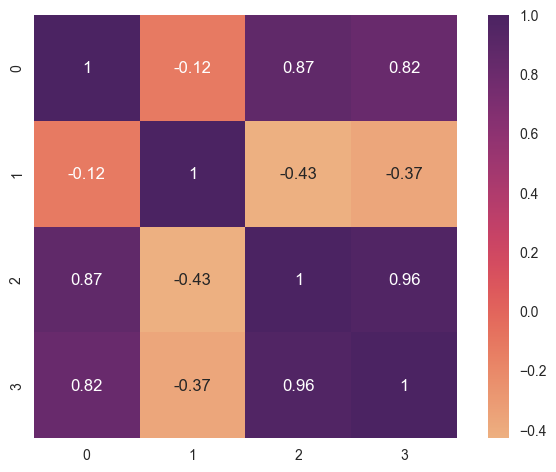

In [35]:
sns.heatmap(my_cors, annot=True,square=True,cmap=sns.color_palette("flare",as_cmap=True))

# sns.heatmap: Seaborn kütüphanesinin ısı haritası çizmek için kullanılan fonksiyonudur.
# my_cors: Isı haritasının temelini oluşturacak olan veri. Genellikle bir korelasyon matrisi olur.
# annot=True: Her bir hücredeki değerin ısı haritasında gösterilmesini sağlar. Bu, ısı haritasını okurken her bir hücredeki sayısal değeri görmemizi sağlar.
# square=True: Hücrelerin kare şeklinde olmasını sağlar. Bu, genellikle ısı haritasının estetik ve düzenli görünmesini sağlamak için kullanılır.
# cmap=sns.color_palette("flare", as_cmap=True): Isı haritasında kullanılacak renk paletini belirler. 
# "flare" paleti, Seaborn'un sunduğu renk paletlerinden biridir ve as_cmap=True parametresi ile bu paletin bir renk haritası (colormap) olarak kullanılmasını sağlar.

In [36]:
# +1: Mükemmel pozitif doğrusal ilişki. Bir değişken artarken diğeri de artar ve bu ilişki tamamen doğrusaldır.
# 0: Hiçbir doğrusal ilişki yok. Değişkenler arasında doğrusal bir ilişki yoktur.
# -1: Yani birbirleri arasında ters yönde zayıf bir ilişkiden bahsedilebilir

<Axes: xlabel='canakU', ylabel='canakG'>

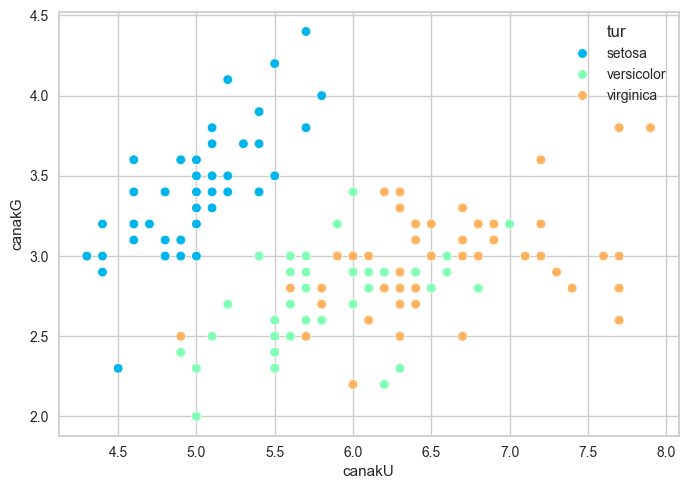

In [38]:
sns.scatterplot(x="canakU",y="canakG",hue="tur",data=df,palette="rainbow") #zayıf

<Axes: xlabel='tacU', ylabel='tacG'>

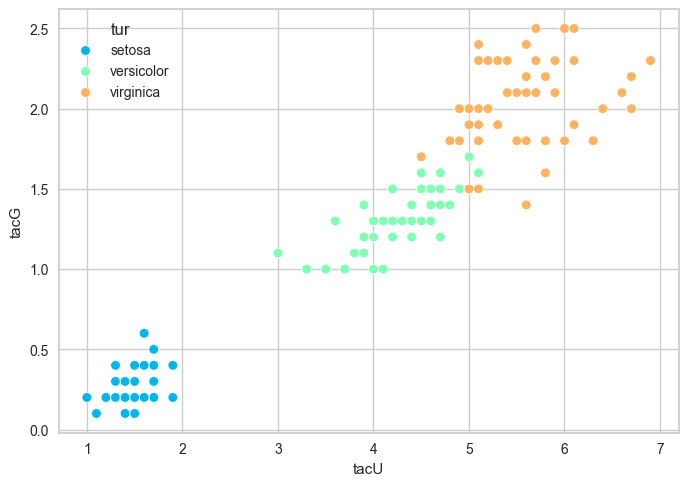

In [40]:
sns.scatterplot(x="tacU",y="tacG",hue="tur",data=df,palette="rainbow") #güçlü

In [42]:
# Modelleme
# KMeans() fonksiyonu ile veri setine uygulanmıştır.
kOrtModeli=KMeans(n_clusters=3, init="k-means++",n_init="auto",random_state=0)
    # n_clusters: Küme sayısı.
    # init:küme merkezlerinin atanmasında kullanılacak yöntem 
    # n_init: Nihai sonuçlar, inertia açısından n_init adet ardışık çalıştırmanın en iyi çıktısıdır.
    # random_state: Küme merkezinin ilk belirlenme aşaması için rastgele sayı üretimini belirler.

    # Modelin Uygulanması
kOrtModeli.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
kOrtModeli.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
# Modelin çıktısından da görüleceği üzere veri setindeki ilk örnek 1 nolu, son örnek 0 nolu kümeye, sondan bir önceki örnek ise 2 nolu kümeye atamıştır.
# 
# Unutulmamalıdır ki; 
# model çıktısındaki 0, 1 ve 2 olarak sunulan küme numaralarının setosa, versicolor ve virginica kategorilerinden hangisini temsil ettiği bilinemez. 
# k-Ortalamalar yalnızca örnekleri kümelere atar; ancak kümelerin etiketini vermez. 
# Analizi yapan uzmanın mutlaka ilgili kümelerdeki örnekleri inceleyerek adlandırma yapması gerekir.

In [50]:
df["kumeler"]=kOrtModeli.labels_

df["kumeler"]=df["kumeler"].astype("category")

df.kumeler.value_counts()# hangi kümeye kaç örnek düştüğü listelenmiştir

kumeler
0    61
1    50
2    39
Name: count, dtype: int64

In [53]:
# Elde edilen üç kümenin küme merkezleri ise kOrtModeli.cluster_centers_ ile elde edilmektedir
kumeMerkezleri=kOrtModeli.cluster_centers_
kumeMerkezleri

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

Text(0, 0.5, 'canakG')

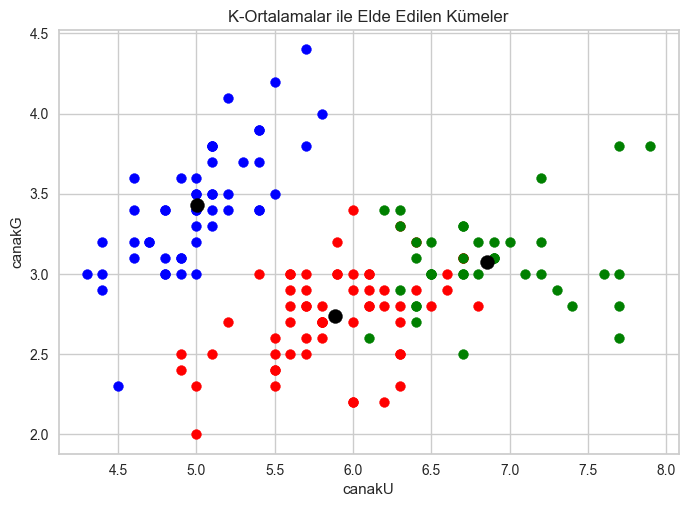

In [56]:
# Aşağıda verilen kodlar yardımı ile çanak yaprak uzunluğu ve çanak yaprak genişliği nitelikleri kullanılarak k-Ortalamalar algoritması ile elde edilen kümeler ve küme merkezleri elde edilmiştir
#Bu kod, k-Ortalamalar algoritması ile Iris veri setindeki çanak yaprak uzunluğu (canakU) ve çanak yaprak genişliği (canakG) özelliklerini kullanarak kümeleri ve küme merkezlerini görselleştirir. 
#Kodun her adımını açıklayalım:

plt.scatter(X[kOrtModeli.labels_==0,0], X[kOrtModeli.labels_==0,1],s=50,c="red")
# X: Verileri içeren numpy dizisi.    
# kOrtModeli.labels_==0: Kümelendirme modelinin 0. kümesine ait olan veri noktalarının indekslerini belirler.
# X[kOrtModeli.labels_==0, 0]: 0. kümeye ait veri noktalarının ilk özelliği (çanak yaprak uzunluğu).
# X[kOrtModeli.labels_==0, 1]: 0. kümeye ait veri noktalarının ikinci özelliği (çanak yaprak genişliği).
# s=50: Noktaların boyutu.
# c="red": Noktaların rengi kırmızı.
# Bu satır, 0. kümeye ait olan veri noktalarını kırmızı renkte ve boyut 50 olacak şekilde çizdirir.

#Yukarıdaki açıklamalar burada da geçerlidir, ancak 1. ve 2. kümelere ait olan veri noktaları sırasıyla mavi ve yeşil renkte çizdirilir.
plt.scatter(X[kOrtModeli.labels_==1,0], X[kOrtModeli.labels_==1,1],s=50,c="blue")
plt.scatter(X[kOrtModeli.labels_==2,0], X[kOrtModeli.labels_==2,1],s=50,c="green")

#Küme Merkezlerini Çizme:
# kOrtModeli.cluster_centers_[:,0]: Küme merkezlerinin ilk özelliği (çanak yaprak uzunluğu).
# kOrtModeli.cluster_centers_[:,1]: Küme merkezlerinin ikinci özelliği (çanak yaprak genişliği).
# s=100: Küme merkezlerinin boyutu.
# c="black": Küme merkezlerinin rengi siyah.
# label=kumeMerkezleri: Küme merkezlerini etiketler.
plt.scatter(kOrtModeli.cluster_centers_[:,0], kOrtModeli.cluster_centers_[:,1],s=100,c="black",label=kumeMerkezleri)

plt.title("K-Ortalamalar ile Elde Edilen Kümeler")
plt.xlabel("canakU")
plt.ylabel("canakG")

[Text(0.5, 1.0, 'K-ortalamalar')]

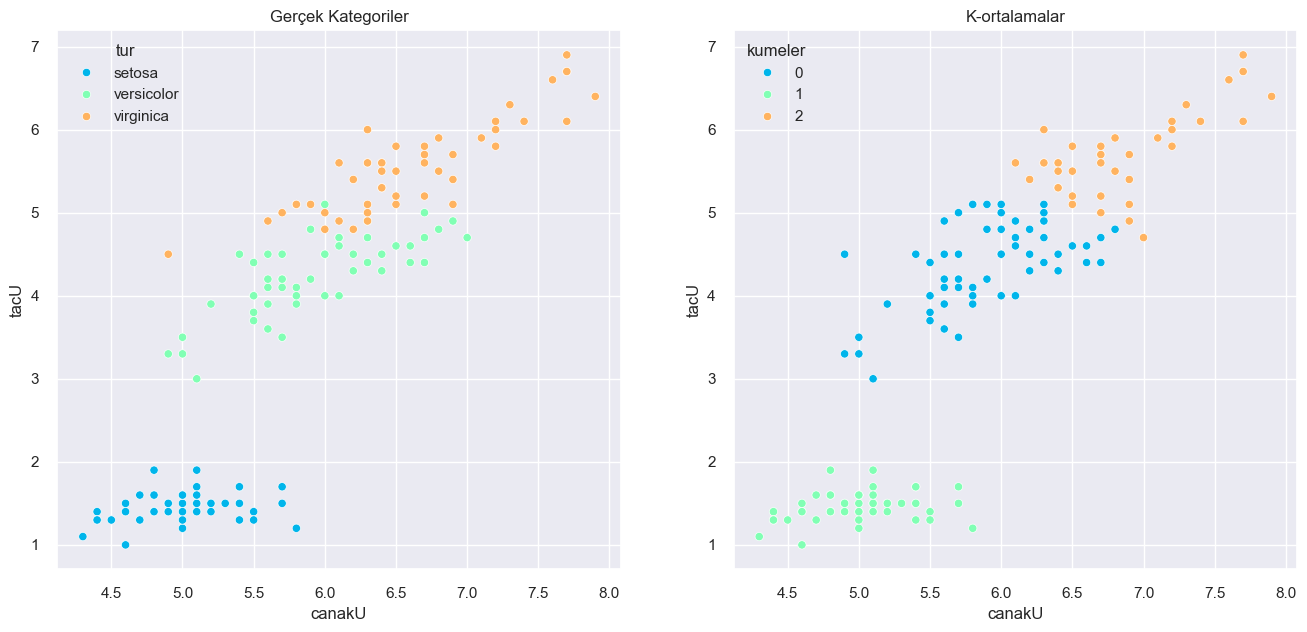

In [63]:
# gerçek kategoriler ile k-Ortalamalar algoritması ile elde edilen kümeler 
# sns.set_theme: Seaborn kütüphanesinde temayı ve genel görsel ayarları yapılandırmak için kullanılır.
sns.set_theme(rc={"figure.figsize":(16,7)}) #rc={"figure.figsize":(16,7)}: Grafiklerin boyutunu ayarlar. Burada, figürün genişliği 16 inç ve yüksekliği 7 inç olarak belirlenmiştir.
fig,axes=plt.subplots(1,2) # Bu satır, matplotlib ile tek bir satırda iki alt grafik içeren bir figür oluşturur.


sns.scatterplot(x="canakU",y="tacU",hue="tur",data=df,palette="rainbow",ax=axes[0]).set(title="Gerçek Kategoriler") 
# sns.scatterplot: Seaborn kütüphanesi ile bir scatterplot (dağılım grafiği) oluşturur.
#     x="canakU": X ekseni için kullanılacak veri sütunu.
#     y="tacU": Y ekseni için kullanılacak veri sütunu.
#     hue="tur": Verileri renklendirmek için kullanılacak kategori sütunu. Bu sayede farklı kategoriler farklı renklerle gösterilir.
#     data=df: Kullanılacak veri çerçevesi.
#     palette="rainbow": Renk paleti olarak gökkuşağı renklerini kullanır.
#     ax=axes[0]: Grafiği, oluşturduğumuz alt grafiklerden birincisine (sol tarafa) yerleştirir.
#     .set(title="Gerçek Kategoriler"): Grafiğin başlığını "Gerçek Kategoriler" olarak ayarlar.
sns.scatterplot(x="canakU",y="tacU",hue="kumeler",data=df,palette="rainbow",ax=axes[1]).set(title="K-ortalamalar")


In [64]:
df["kumeler"]

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: kumeler, Length: 150, dtype: category
Categories (3, int32): [0, 1, 2]

In [66]:
df["tur"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: tur, Length: 150, dtype: object

WSS: 78.856
Silhouette Katasayısı Değeri: 0.551


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

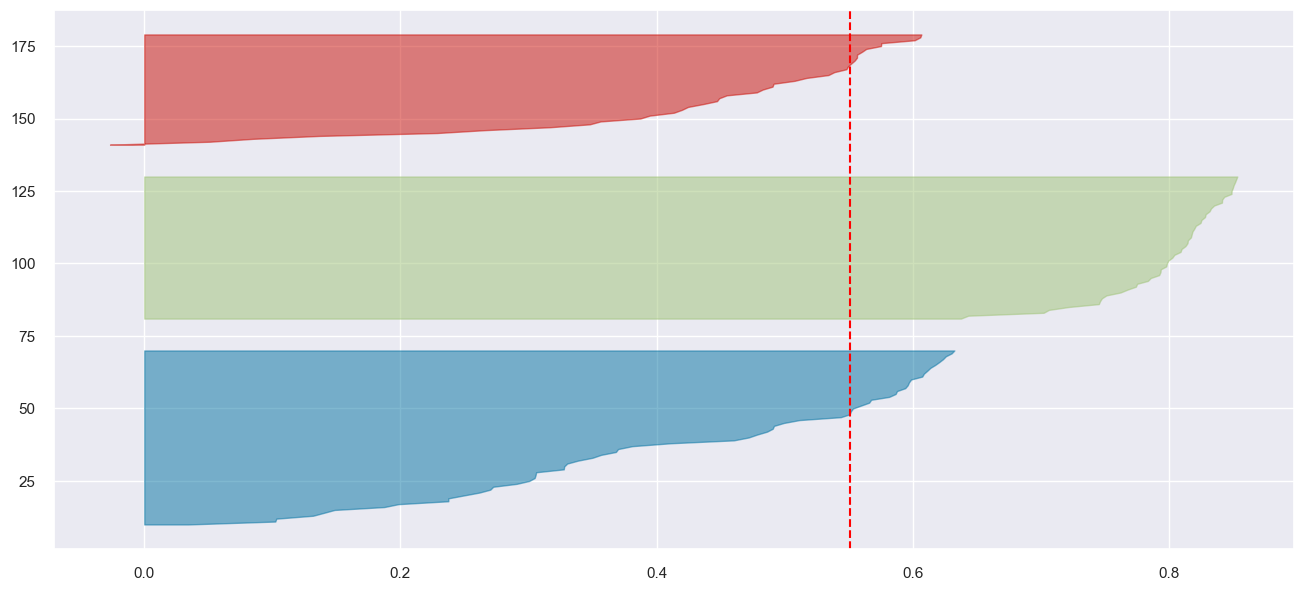

In [74]:
# Performans Değerlendirme  WCSS ve Silhouette
# WCSS doğrudan modelin bir özelliği olarak elde edilirken (inertia_),
kOrtModeli.inertia_ 
print("WSS: %.3F" % kOrtModeli.inertia_)
# Silhouette için  silhouette_score() fonksiyonu
silh_katsayisi= silhouette_score(X=X,labels=kOrtModeli.labels_,metric="euclidean")
print("Silhouette Katasayısı Değeri: %.3f" % silh_katsayisi)

grafik=SilhouetteVisualizer(kOrtModeli,colors="yellowbrick")
grafik.fit(X)


Text(0, 0.5, 'WCSS')

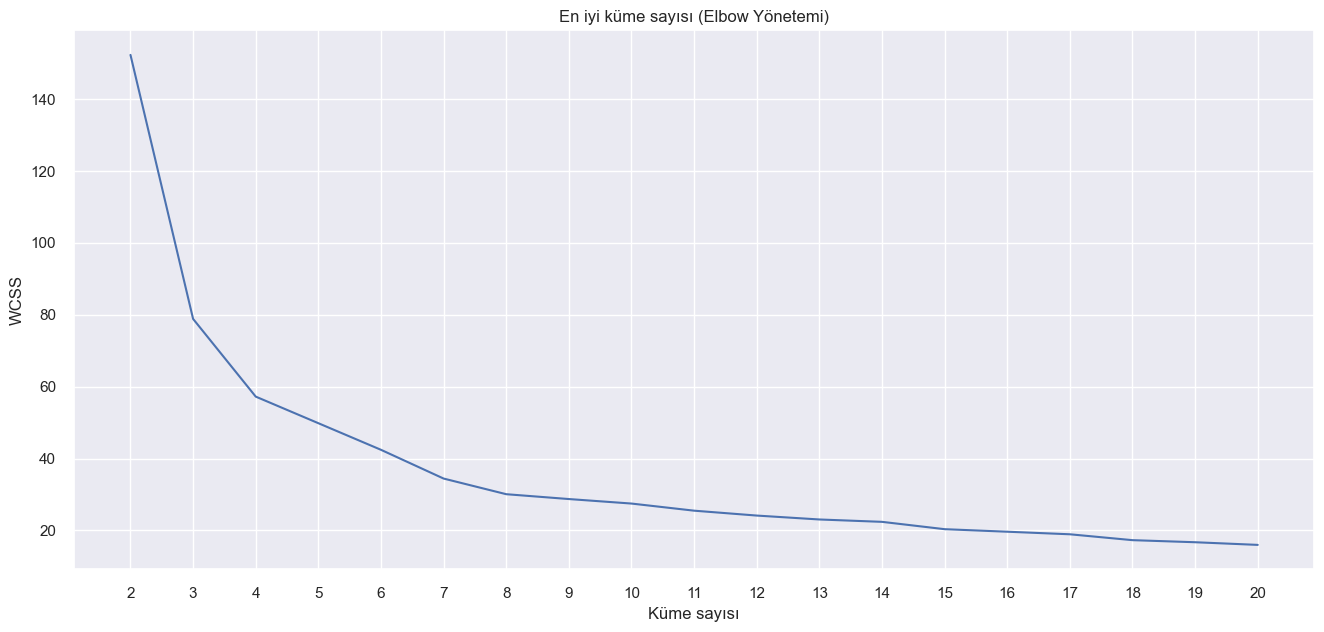

In [76]:
# Kümeleme Kalitesinin Belirlenmesi
# k küme sayısı değiştirilerek farklı modeller denemek ve modellerin kümeleme kalitesini WCSS ya da Silhouette katsayısı yardımı ile kıyaslamak mümkündür.

#Dirsek Yöntemi

# Aşağıdaki kod bloğunda X veri seti kullanılarak k-Ortalamalar algoritmasının ideal küme sayısının belirlenmesi için 2’den 20’ye kadar k değerleriyle model kurulmuştur

# Aşağıdaki kod bloğunda X veri seti kullanılarak k-Ortalamalar algoritmasının ideal küme sayısının belirlenmesi için 2’den 20’ye kadar k değerleriyle model kurulmuştur. 
# Her bir k küme sayısına ait WCSS değeri (kOrtModeli.inertia_) wcss dizisine eklenmiştir.
wcss=[]
k=range(2,21)
for i in k:
    kOrtModeli=KMeans(n_clusters=i,init="k-means++",n_init="auto",random_state=0)
    kOrtModeli.fit(X)
    wcss.append(np.round(kOrtModeli.inertia_,3))
wcss

plt.plot(k,wcss)
plt.xticks(k)
plt.title("En iyi küme sayısı (Elbow Yönetemi)")
plt.xlabel("Küme sayısı")
plt.ylabel("WCSS")

Text(0, 0.5, 'Silhouette')

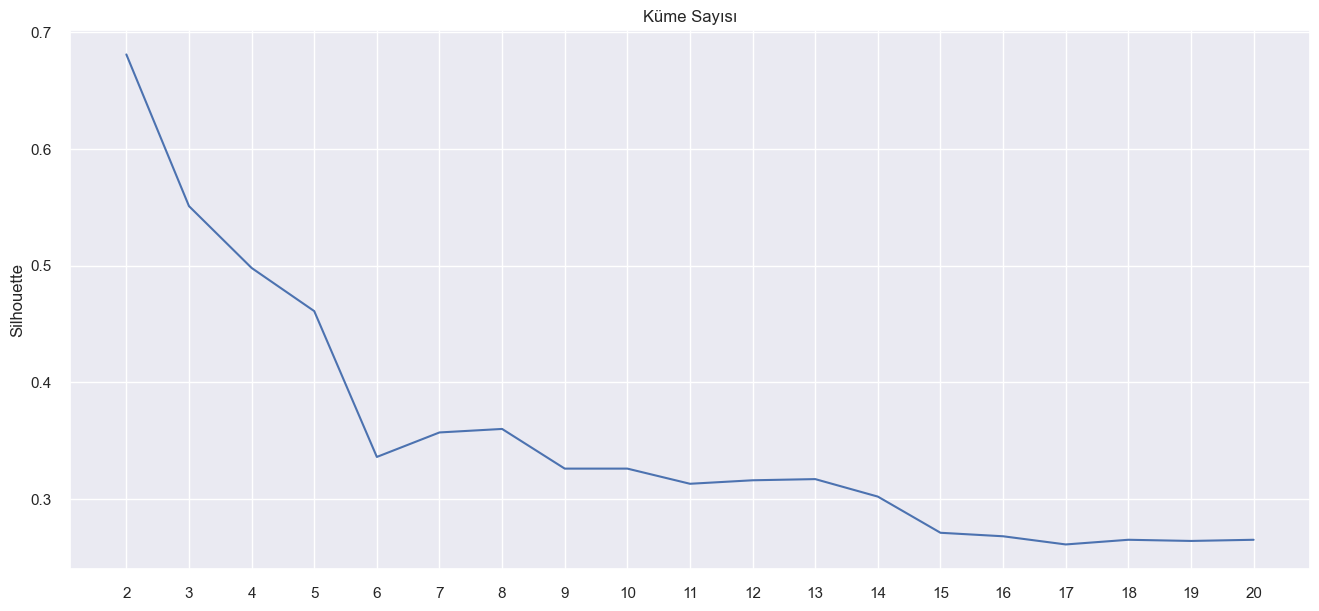

In [77]:
# Silhouette Katsayısı Yöntemi
# İdeal küme sayısını bulmak için dirsek yöntemindekinin dışında Silhouette katsayısı da kullanılabilir. Bu yöntemde Silhouette katsayısı hesaplanarak silhs listesine atanmıştır.
#  Küme sayısına göre hesaplanan Silhouette katsayılarının yer aldığı grafik Şekil'de verilmiştir.

silhs=[]
k=range(2,21)
for i in k:
    kOrtModeli=KMeans(n_clusters=i,init="k-means++",n_init="auto",random_state=0)
    kOrtModeli.fit(X)
    silh_degeri=silhouette_score(X,kOrtModeli.labels_,metric="euclidean")
    silhs.append(np.round(silh_degeri,3))

plt.plot(k,silhs)
plt.xticks(k)
plt.title("Küme Sayısı")
plt.ylabel("Silhouette")